In [1]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import pandas as pd 

# Import dataset:
#input file
#constituency="DublinWest2002_merged"
constituency="Meath2002_merged"
url='../data/processed/'+constituency+'_dist.csv'

# Assign column names to dataset:

# Convert dataset to a pandas dataframe:
dataset = pd.read_csv(url,  na_values=["Missing"], header=[0]) 

In [2]:
dataset.shape

(50099, 15)

In [3]:
print(dataset.columns)
display(dataset)

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', 'Seq'],
      dtype='object')


,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,Seq
0,0,0.000000,0.000000,6.363961,2.236068,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
1,1,0.000000,0.000000,1.004988,0.000000,3.605551,1.581139,4.301163,4.301163,0.0,0.0,2.236068,2.236068,4.609772,1
2,2,3.605551,3.605551,0.000000,4.301163,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
3,3,0.000000,0.000000,3.605551,2.915476,2.236068,3.465545,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
4,4,0.000000,6.363961,2.236068,1.581139,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50094,50094,4.609772,8.139410,4.301163,3.465545,1.004988,1.004988,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0
50095,50095,0.000000,3.605551,2.915476,2.236068,4.301163,1.004988,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0
50096,50096,7.138627,8.139410,4.301163,3.465545,3.067572,3.605551,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0
50097,50097,4.301163,6.363961,2.236068,0.000000,0.000000,4.301163,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0


In [7]:
# Use head() function to return the first 5 rows: 
dataset.head() 
# Assign values to the X and y variables:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 14].values 

In [8]:
print(y)

[1 1 1 ... 0 0 0]


In [9]:
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[5010   46]
 [  93 4871]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5056
           1       0.99      0.98      0.99      4964

    accuracy                           0.99     10020
   macro avg       0.99      0.99      0.99     10020
weighted avg       0.99      0.99      0.99     10020



[[5010   46]
 [  93 4871]]


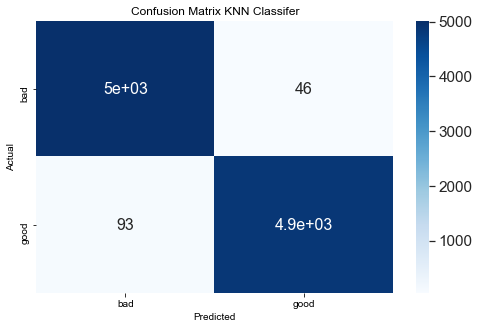

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix) #display confusion matrix
y_true = ["good", "bad"]
#y_pred = ["good", "bad"]
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm.dtypes
plt.figure(figsize = (8,5))
plt.title('Confusion Matrix' + " KNN Classifer")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.show()

In [11]:
#[row, column]
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Classification Accuracy
# use float to perform true division, not integer division
accuracy = ((TP + TN) / float(TP + TN + FP + FN))
#accuracy = accuracy_score(Y_test, y_pred_class)
print("Accuracy : %.4f" %accuracy)

# Classification Error/Misclassification Rate = 1 - accuracy
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error Rate : %.4f" %(classification_error))

# Precision
precision = TP / float(TP + FP)
print("Precision : %.4f" %(precision))
#print("Precision : %.4f" %(precision_score(Y_test, y_pred)))

# Sensitivity or Recall or True Positive Rate
sensitivity = TP / float(FN + TP)
print("Sensitivity/Recall :%.4f" %(sensitivity))
#print("Sensitivity/Recall : %.4f" %(recall_score(Y_test, y_pred)))

# Specificity oe true negative rate
specificity = TN / (TN + FP)
print("Specificity : %.4f" %(specificity))

# False Positive Rate (1 - specificity))
false_positive_rate = FP / float(TN + FP)
print("False Positive Rate : %.4f" %(false_positive_rate))

# False Negative Rate
false_negative_rate = FN / float(TP + FN)
print("False Negative Rate : %.4f" %(false_negative_rate))

# F1 Measure (F1 Score) = 2 * ((precision * sensitivity)/(precision + sensitivity))
F1_measure = 2* ((precision * sensitivity)/(precision + sensitivity))
print("F1-Measure : %.4f" %(F1_measure))

# Cross Validation is used to check the model is not overfitting
c_v_score = cross_val_score(classifier,X_train,y_train,cv = 10).mean()
print("cross val score: : %.4f" %(c_v_score))

Accuracy : 0.9861
Classification Error Rate : 0.0139
Precision : 0.9906
Sensitivity/Recall :0.9813
Specificity : 0.9909
False Positive Rate : 0.0091
False Negative Rate : 0.0187
F1-Measure : 0.9859
cross val score: : 0.9842


In [12]:
# Import dataset and classes needed in this example:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Import Gaussian Naive Bayes classifier:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



# Import dataset:
#input file
constituency="DublinWest2002_merged"
url='../data/processed/'+constituency+'toptail_dist.csv'

# Load dataset: 
#data = load_iris()


# Convert dataset to a pandas dataframe:
data = pd.read_csv(url,  na_values=["Missing"], header=[0]) 

# Organize data:
label_names = 'Seq'
labels = data['Seq']
#drop the numbers column (#df=df.drop(['No.'], 1))
data = data.drop(data.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
data= data.drop(columns=['Seq'], axis=1)  
print(data)
feature_names = data.columns
features = data

            1          2          3          4          5          6  \
0    3.605551  11.629703   6.020797   5.622277   7.138627   7.138627   
1    1.615549   0.000000   1.004988   3.605551   1.581139   2.236068   
2    0.000000   3.067572   6.184658   4.301163   0.000000   0.000000   
3    3.605551  11.629703  10.689247   1.615549   7.071068   5.622277   
4   11.629703   3.605551   4.301163   7.071068   2.236068   4.609772   
5    4.301163   3.605551   6.363961   5.622277   0.000000   7.138627   
6    7.138627   7.138627  10.689247   6.020797   0.000000   0.000000   
7    0.000000   7.138627   4.609772   7.433034   8.732125   2.915476   
8    7.138627   0.000000   3.067572   2.915476   6.363961   0.000000   
9    7.138627  10.689247   6.020797   2.915476   3.067572   1.004988   
10   4.301163  11.629703  12.298374   8.732125   7.138627   5.622277   
11   4.301163  11.629703  12.298374   8.732125   7.138627   5.622277   
12   4.301163   8.139410   7.138627   5.622277   7.071068  12.29

In [13]:
# Print data:
print(label_names)
#print('Class label = ', labels[0])
print(feature_names)
print(features)

Seq
Index(['1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')
            1          2          3          4          5          6  \
0    3.605551  11.629703   6.020797   5.622277   7.138627   7.138627   
1    1.615549   0.000000   1.004988   3.605551   1.581139   2.236068   
2    0.000000   3.067572   6.184658   4.301163   0.000000   0.000000   
3    3.605551  11.629703  10.689247   1.615549   7.071068   5.622277   
4   11.629703   3.605551   4.301163   7.071068   2.236068   4.609772   
5    4.301163   3.605551   6.363961   5.622277   0.000000   7.138627   
6    7.138627   7.138627  10.689247   6.020797   0.000000   0.000000   
7    0.000000   7.138627   4.609772   7.433034   8.732125   2.915476   
8    7.138627   0.000000   3.067572   2.915476   6.363961   0.000000   
9    7.138627  10.689247   6.020797   2.915476   3.067572   1.004988   
10   4.301163  11.629703  12.298374   8.732125   7.138627   5.622277   
11   4.301163  11.629703  12.298374   8.732125   7.138627   5.622277

In [14]:
# Split dataset into random train and test subsets:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)

# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(train, train_labels)
# Make predictions with the classifier:
predictive_labels = gnb.predict(test)
print(predictive_labels)

# Evaluate label (subsets) accuracy:
print(accuracy_score(test_labels, predictive_labels))

[1 0 0 1 1 1 0]
1.0
